# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

fatal: destination path 'damavand' already exists and is not an empty directory.


In [2]:
!pip install -r damavand/requirements.txt

# Importings

In [4]:
from damavand.damavand.datasets.downloaders import read_addresses, ZipDatasetDownloader
from damavand.damavand.datasets.digestors import MFPT
from damavand.damavand.signal_processing import *
from damavand.damavand.utils import *
import pandas as pd
import numpy as np

# Instantiating a downloader object

In [5]:
addresses = read_addresses()
downloader = ZipDatasetDownloader(addresses['MFPT'])
downloader.download_extract('MFPT.zip', 'MFPT/')

# Instantiating a digestor object

In [9]:
mfpt = MFPT('MFPT/MFPT Fault Data Sets/', [
    '1 - Three Baseline Conditions',
    '2 - Three Outer Race Fault Conditions',
    '3 - Seven More Outer Race Fault Conditions',
    '4 - Seven Inner Race Fault Conditions',
])
mining_params = {
    97656: {'win_len': 16671, 'hop_len': 2000},
    48828: {'win_len': 8337, 'hop_len': 1000},
}
mfpt.mine(mining_params)

# Aggregating the data recorded at 48828 Hz

In [11]:
df = pd.concat(mfpt.data[48828]).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,8331,8332,8333,8334,8335,8336,Fs,load,rot_speed,state
0,-0.085168,0.731480,0.242892,-0.293628,-0.359747,-0.088577,-1.339288,-1.246970,0.590776,0.838972,...,-0.549527,-1.330452,-0.907847,0.160664,-0.615105,0.630302,48828,2,25,OR
1,-0.278591,-0.499689,-1.160509,-0.685309,0.211426,0.176170,-0.519083,-0.694969,-0.046356,-0.962116,...,-0.243175,-0.742063,-0.201261,-1.282029,-0.636861,-0.745780,48828,2,25,OR
2,-0.171715,0.005304,-0.796947,-0.044485,0.359046,0.442996,-0.625035,-0.220643,-1.768144,-0.490632,...,-0.069762,0.281827,-0.316616,0.589422,-0.377271,-1.539540,48828,2,25,OR
3,-1.567388,-1.486268,-0.915920,-0.292361,0.064408,-0.161513,1.384290,2.198109,1.031693,0.645119,...,-1.000571,-0.692434,0.038406,-0.723900,-0.168577,0.338545,48828,2,25,OR
4,0.512757,-0.965155,-0.637637,-0.062846,0.470696,-0.287562,-0.667170,1.254230,0.495049,0.011666,...,-0.689739,-0.622513,-0.228925,0.564417,0.113176,0.514714,48828,2,25,OR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0.046651,0.964429,0.699744,1.120085,0.214034,-0.869847,-1.352800,-0.406842,-0.547977,-0.308420,...,-0.899934,-0.136754,-0.310869,-1.057313,-0.045470,0.010755,48828,200,25,IR
1942,0.257314,0.124608,-2.267157,-2.953130,-2.408685,-1.164250,-2.292642,-2.277321,1.695946,2.192952,...,-0.286110,-0.345276,1.061669,-0.896723,-1.427693,0.102212,48828,200,25,IR
1943,-1.633568,-1.790812,-0.752351,-1.098833,-0.924792,0.464506,0.293112,-0.844595,-1.455221,-0.726435,...,0.325107,0.304273,0.505915,0.767069,-0.425042,-0.340255,48828,200,25,IR
1944,-1.172901,-1.347016,0.056361,-0.182544,-0.263775,-0.199575,0.175579,-0.773320,-0.399987,-0.777098,...,-5.343406,1.184678,1.882170,13.206370,-0.682885,8.922581,48828,200,25,IR


In [12]:
signals, metadata = df.iloc[:, : - 4], df.iloc[:, - 4 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,8327,8328,8329,8330,8331,8332,8333,8334,8335,8336
0,-0.085168,0.731480,0.242892,-0.293628,-0.359747,-0.088577,-1.339288,-1.246970,0.590776,0.838972,...,0.201138,0.130860,0.622784,-0.281741,-0.549527,-1.330452,-0.907847,0.160664,-0.615105,0.630302
1,-0.278591,-0.499689,-1.160509,-0.685309,0.211426,0.176170,-0.519083,-0.694969,-0.046356,-0.962116,...,-0.171530,0.577990,-0.329094,-0.902039,-0.243175,-0.742063,-0.201261,-1.282029,-0.636861,-0.745780
2,-0.171715,0.005304,-0.796947,-0.044485,0.359046,0.442996,-0.625035,-0.220643,-1.768144,-0.490632,...,-0.193090,0.363131,0.773935,-1.056636,-0.069762,0.281827,-0.316616,0.589422,-0.377271,-1.539540
3,-1.567388,-1.486268,-0.915920,-0.292361,0.064408,-0.161513,1.384290,2.198109,1.031693,0.645119,...,0.526466,0.843377,0.352315,0.299671,-1.000571,-0.692434,0.038406,-0.723900,-0.168577,0.338545
4,0.512757,-0.965155,-0.637637,-0.062846,0.470696,-0.287562,-0.667170,1.254230,0.495049,0.011666,...,-0.029497,-0.317748,-0.312468,-0.415579,-0.689739,-0.622513,-0.228925,0.564417,0.113176,0.514714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0.046651,0.964429,0.699744,1.120085,0.214034,-0.869847,-1.352800,-0.406842,-0.547977,-0.308420,...,0.060520,0.493154,0.053875,-0.716271,-0.899934,-0.136754,-0.310869,-1.057313,-0.045470,0.010755
1942,0.257314,0.124608,-2.267157,-2.953130,-2.408685,-1.164250,-2.292642,-2.277321,1.695946,2.192952,...,-0.377677,-0.486399,0.752745,0.507970,-0.286110,-0.345276,1.061669,-0.896723,-1.427693,0.102212
1943,-1.633568,-1.790812,-0.752351,-1.098833,-0.924792,0.464506,0.293112,-0.844595,-1.455221,-0.726435,...,-1.379294,-0.783276,-0.917630,-0.010078,0.325107,0.304273,0.505915,0.767069,-0.425042,-0.340255
1944,-1.172901,-1.347016,0.056361,-0.182544,-0.263775,-0.199575,0.175579,-0.773320,-0.399987,-0.777098,...,12.488420,-5.364461,-8.529275,-14.263980,-5.343406,1.184678,1.882170,13.206370,-0.682885,8.922581


In [13]:
metadata

,Fs,load,rot_speed,state
0,48828,2,25,OR
1,48828,2,25,OR
2,48828,2,25,OR
3,48828,2,25,OR
4,48828,2,25,OR
...,...,...,...,...
1941,48828,200,25,IR
1942,48828,200,25,IR
1943,48828,200,25,IR
1944,48828,200,25,IR


# Signal Processing

## Envelope Extraction

In [14]:
signals_env = env(signals)
signals_env.shape

(1946, 8337)

## FFT

In [15]:
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [5, 23500], 'bandpass', fs = float(metadata.iloc[0, 0]), output='sos')

In [16]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(1946, 4168)

## ZoomedFFT

In [17]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 2500, 2500, float(metadata.iloc[0, 0]), freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(1946, 2500)

## STFT

In [18]:
STFT_window = scipy.signal.windows.hann(2400)
STFT_freq_filter = scipy.signal.butter(25, [5, 23500], 'bandpass', fs = float(metadata.iloc[0, 0]), output='sos')
signals_env_STFT = stft(signals_env, 2400, 200, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(1946, 30, 1200)

## Statistical Features

In [19]:
feature(signals, {'mean': np.mean, 'var': np.var, 'rms': rms})

,mean,var,rms
0,-0.178648,0.930869,0.981216
1,-0.183928,0.960903,0.997363
2,-0.181705,0.915440,0.973887
3,-0.185514,0.920759,0.977331
4,-0.184203,0.925301,0.979404
...,...,...,...
1941,-0.212814,3.659572,1.924802
1942,-0.214259,3.713734,1.938979
1943,-0.210920,4.043705,2.021928
1944,-0.207534,4.207129,2.061601


# Visualization

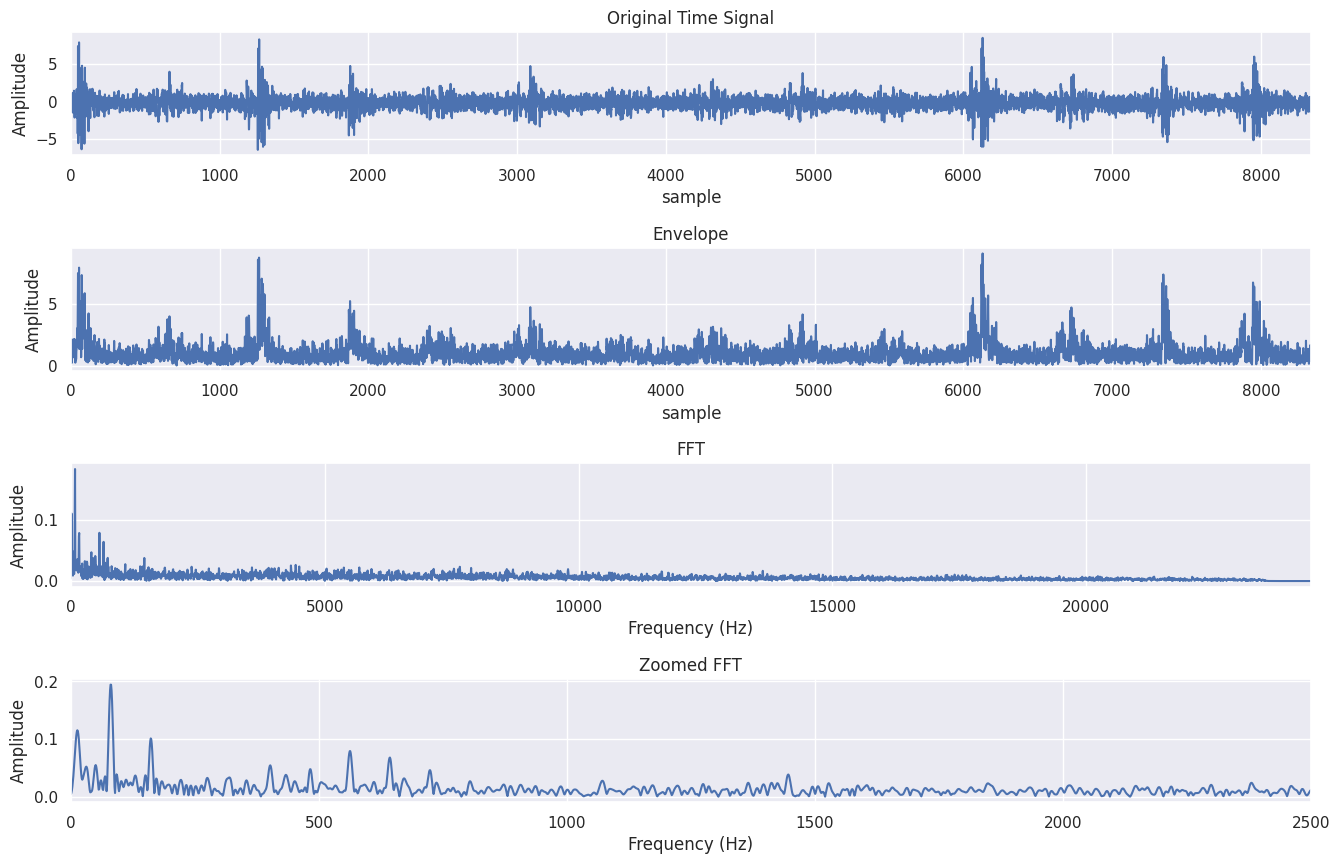

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 8337)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 8337)


sns.lineplot(ax=axes[2], x = fft_freq_axis(8337, 48828), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 24424)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 2500, 2500), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 2500)


plt.subplots_adjust(hspace = 0.75)
fig.show()

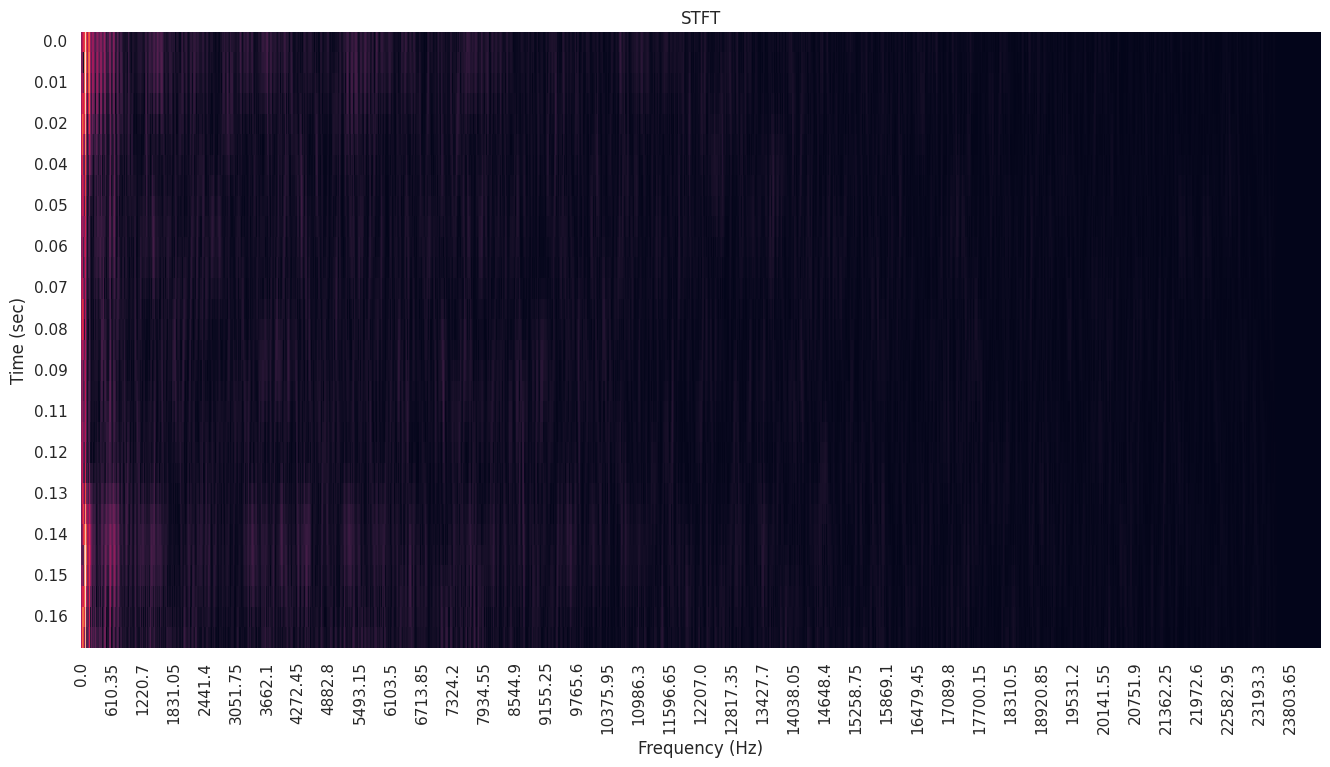

In [23]:
t = np.linspace(0, 0.1707, 30)
f = fft_freq_axis(2400, 48828)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::30])
ax.set_yticks(ax.get_yticks()[::2])


fig.show()